Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [20]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Q1. Load the dataset 

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\slc mini project\dataset.csv')

In [4]:
df.shape

(195, 24)

In [11]:
df['name'].nunique()  ##  this column is seles becouse of  its uniqeness

195

In [6]:
df.name ## name 

0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
            ...      
190    phon_R01_S50_2
191    phon_R01_S50_3
192    phon_R01_S50_4
193    phon_R01_S50_5
194    phon_R01_S50_6
Name: name, Length: 195, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
## all columns are of numerical nature , there is no misssing values , 

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [14]:
df['status'].value_counts('p')

1    0.753846
0    0.246154
Name: status, dtype: float64

In [ ]:
## we can say there  is a class imbalance 

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [15]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
## THERE ARE NO MISSING VALUES

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [25]:
df1 = df.copy()

In [27]:
df1_num = df.select_dtypes(exclude ='object')

In [39]:
df2_num = df.select_dtypes(exclude ='object')

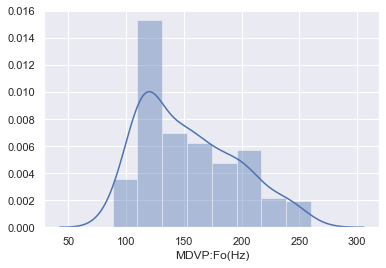

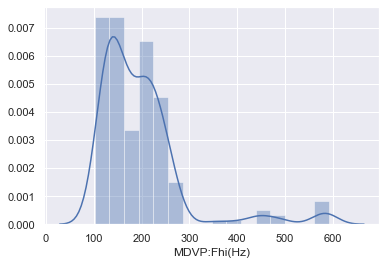

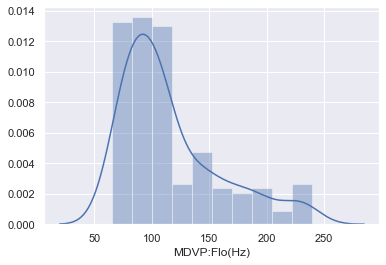

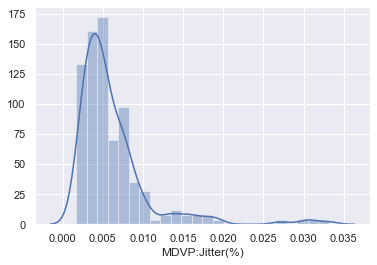

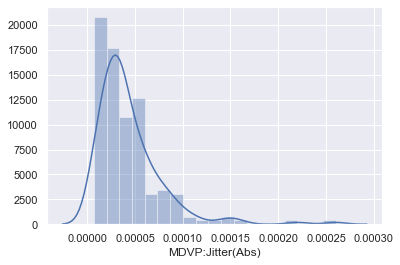

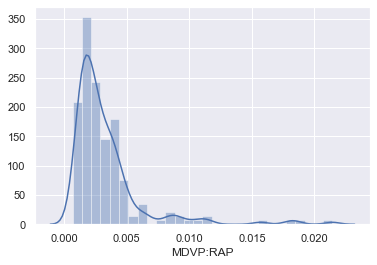

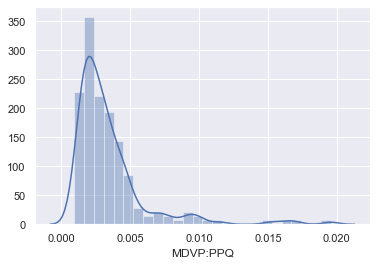

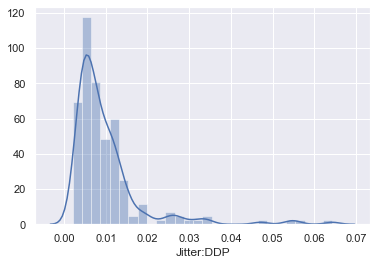

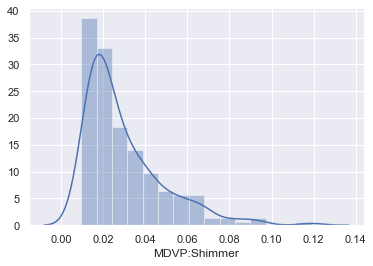

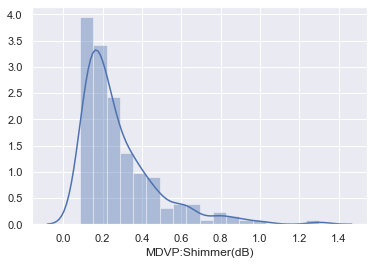

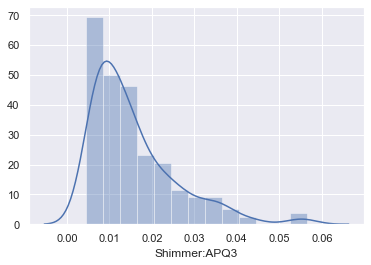

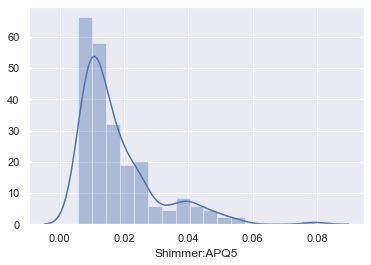

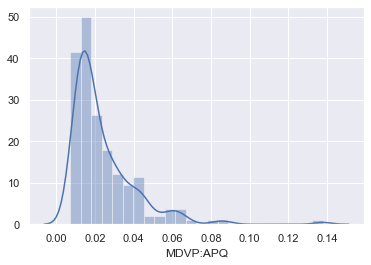

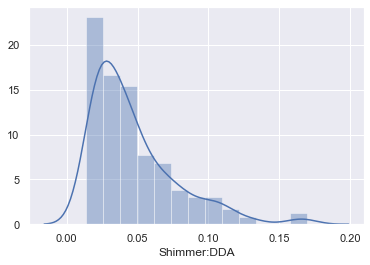

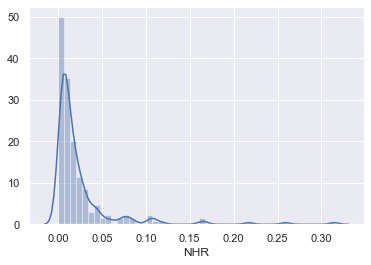

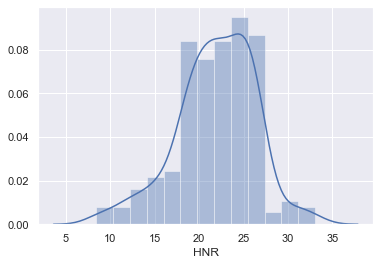

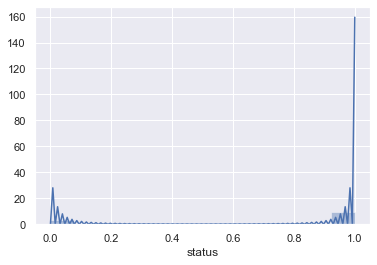

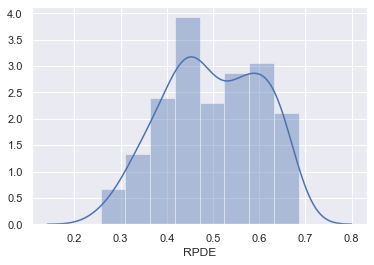

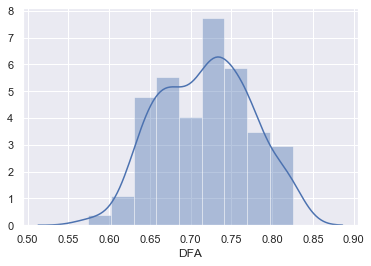

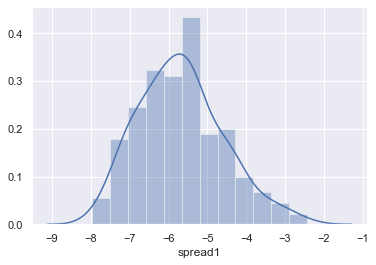

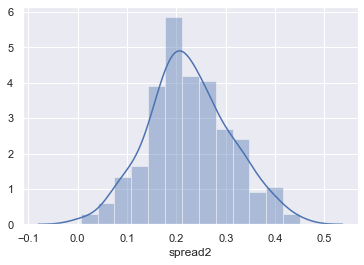

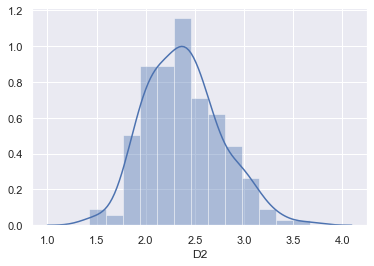

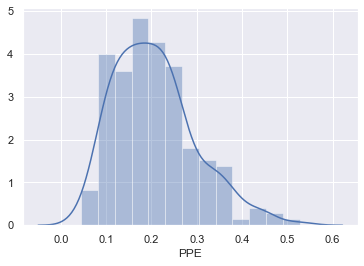

In [29]:
for i in df1_num.columns:
    sns.distplot(df1_num[i])
    plt.show()
    

In [30]:
## DATA IS SKEWED in most of the columns , so we might  have to normalize data 
    
    
    
    
    

In [41]:
for i in df2_num.columns:
    
    q1 = df2_num[i].quantile(0.25)
    q3 = df2_num[i].quantile(0.75)
    iqr = q3 -q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    print(i)
    print(df2_num[df2_num[i] >ub].shape[0])
    print(df2_num[df2_num[i] <lb].shape[0])
    

MDVP:Fo(Hz)
0
0
MDVP:Fhi(Hz)
11
0
MDVP:Flo(Hz)
9
0
MDVP:Jitter(%)
14
0
MDVP:Jitter(Abs)
6
0
MDVP:RAP
14
0
MDVP:PPQ
15
0
Jitter:DDP
14
0
MDVP:Shimmer
8
0
MDVP:Shimmer(dB)
10
0
Shimmer:APQ3
6
0
Shimmer:APQ5
13
0
MDVP:APQ
12
0
Shimmer:DDA
6
0
NHR
19
0
HNR
0
3
status
0
48
RPDE
0
0
DFA
0
0
spread1
4
0
spread2
1
1
D2
1
0
PPE
5
0


### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

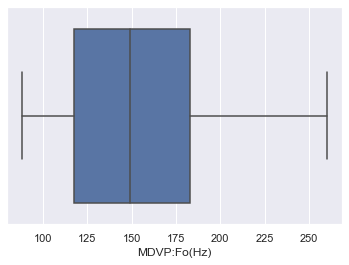

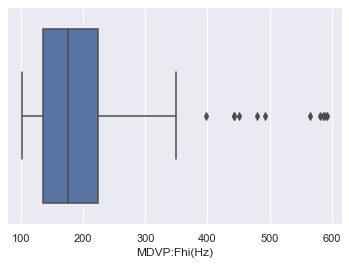

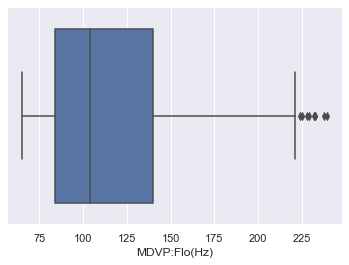

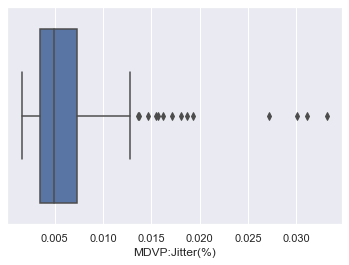

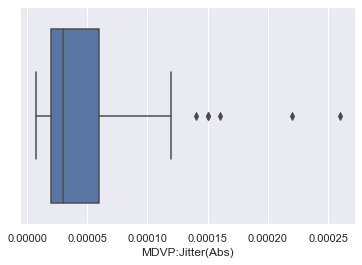

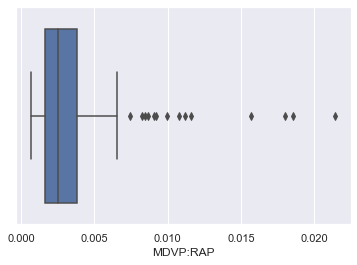

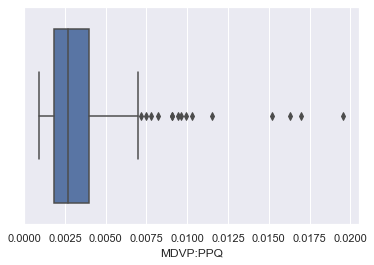

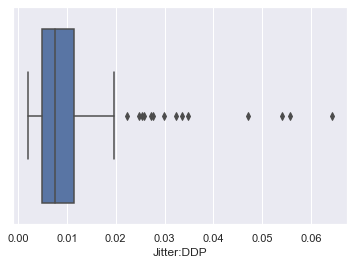

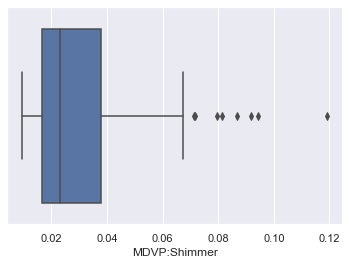

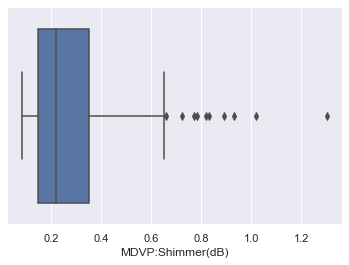

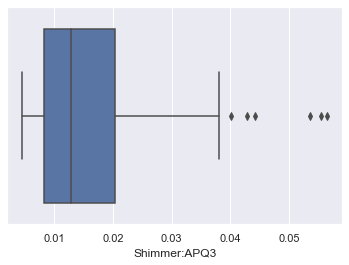

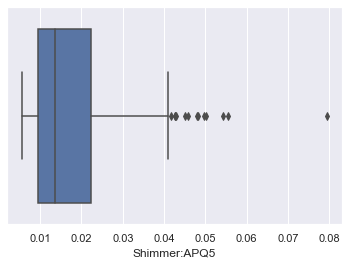

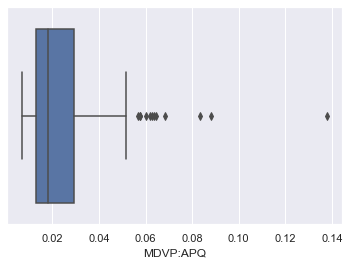

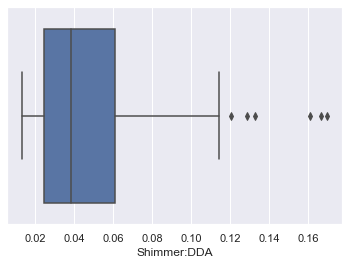

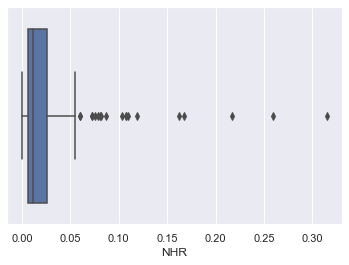

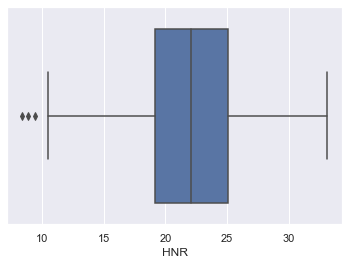

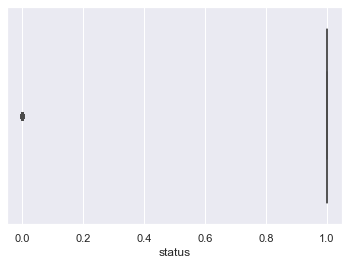

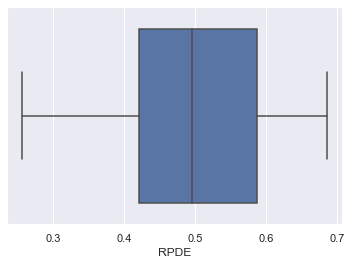

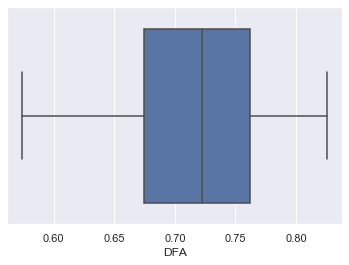

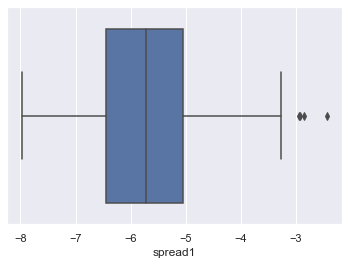

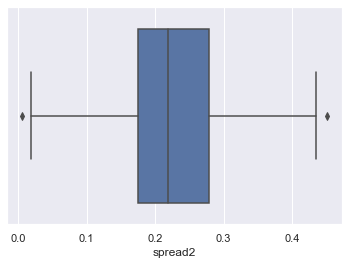

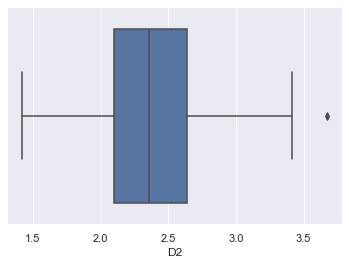

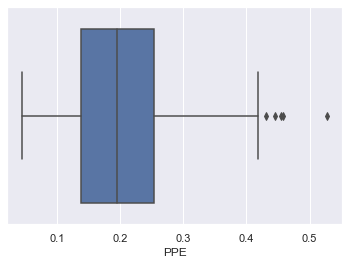

In [31]:
for i in df1_num.columns:
    sns.boxplot(df1_num[i])
    plt.show()

In [36]:
for i in df1_num.columns:
    q1 = df1_num[i].quantile(0.25)
    q3 = df1_num[i].quantile(0.75)
    iqr = q3 -q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    
    df1_num[i] = df1_num[i].replace(df1_num[df1_num[i]>ub][i] , df1_num[i].quantile(0.92))
    df1_num[i] =df1_num[i].replace(df1_num[df1_num[i]<lb][i] , df1_num[i].quantile(0.02)) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

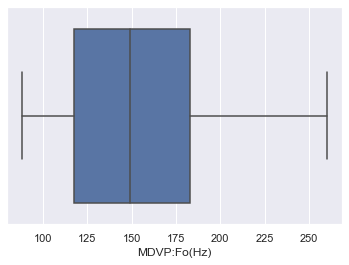

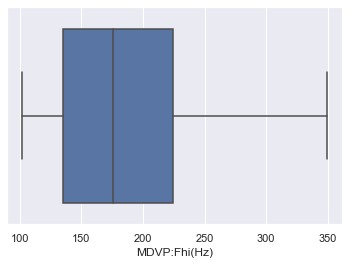

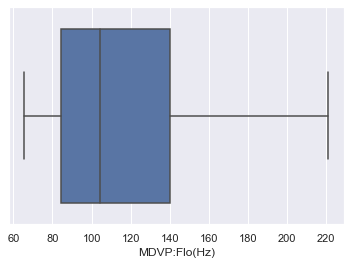

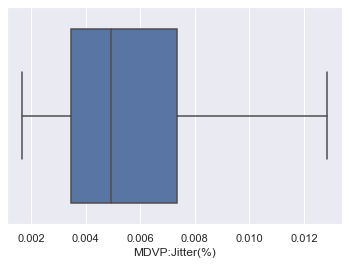

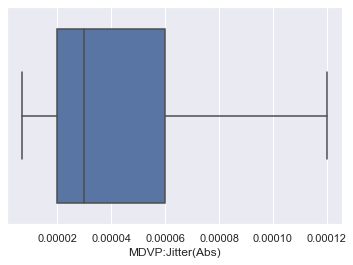

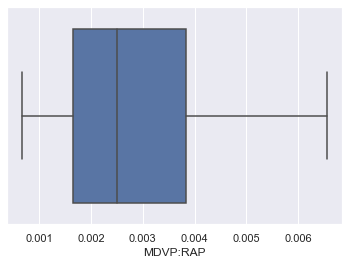

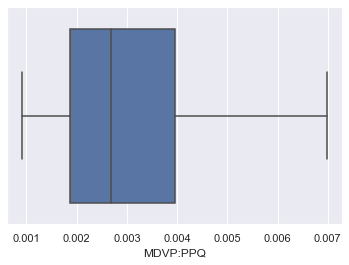

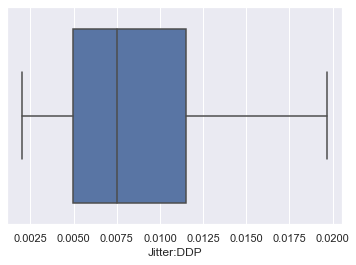

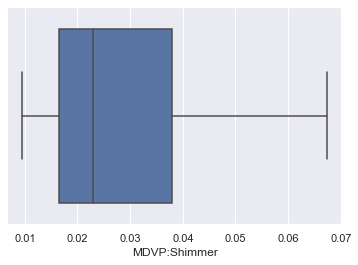

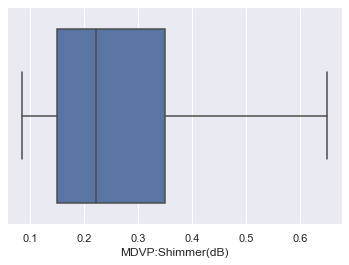

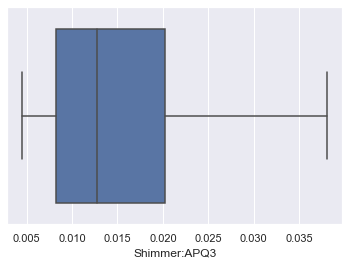

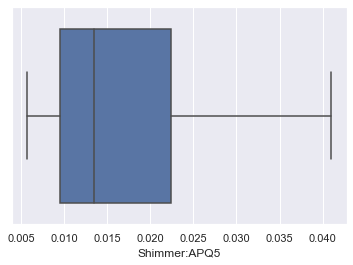

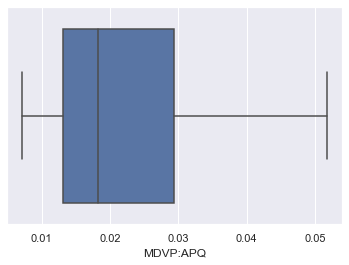

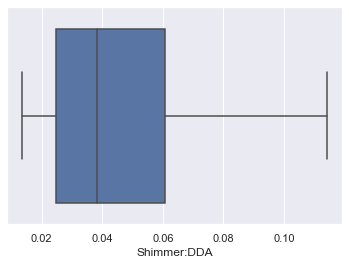

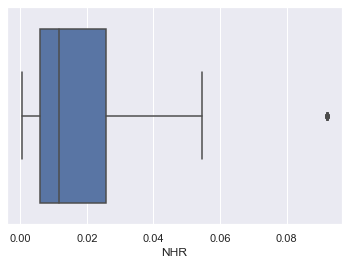

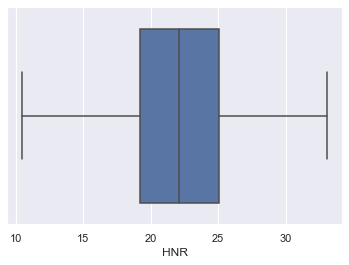

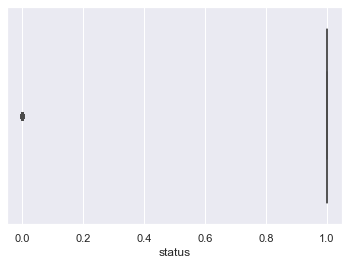

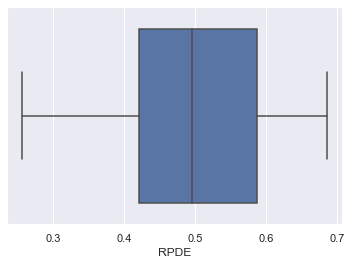

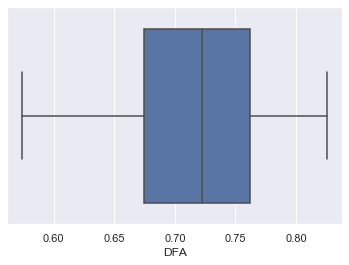

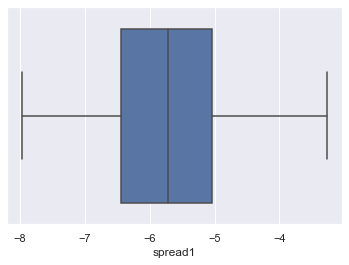

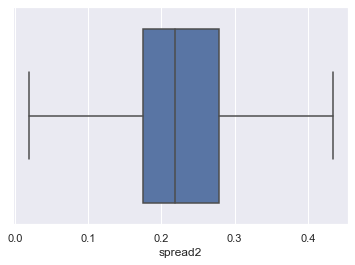

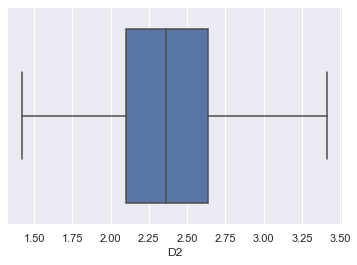

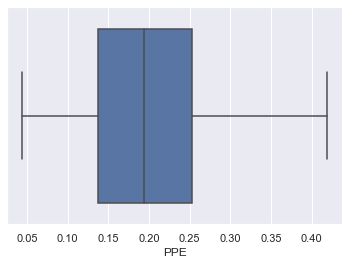

In [37]:
for i in df1_num.columns:
    sns.boxplot(df1_num[i])
    plt.show()

In [42]:
for i in df1_num.columns:
    
    q1 = df1_num[i].quantile(0.25)
    q3 = df1_num[i].quantile(0.75)
    iqr = q3 -q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    print(i)
    print(df1_num[df1_num[i] >ub].shape[0])
    print(df1_num[df1_num[i] <lb].shape[0])
    

MDVP:Fo(Hz)
0
0
MDVP:Fhi(Hz)
0
0
MDVP:Flo(Hz)
0
0
MDVP:Jitter(%)
0
0
MDVP:Jitter(Abs)
0
0
MDVP:RAP
0
0
MDVP:PPQ
0
0
Jitter:DDP
0
0
MDVP:Shimmer
0
0
MDVP:Shimmer(dB)
0
0
Shimmer:APQ3
0
0
Shimmer:APQ5
0
0
MDVP:APQ
0
0
Shimmer:DDA
0
0
NHR
19
0
HNR
0
0
status
0
48
RPDE
0
0
DFA
0
0
spread1
0
0
spread2
0
0
D2
0
0
PPE
0
0


In [ ]:
## allmost all the outliers have been removed except for  exept for nhr

### Q7. Are there any strong correlations among the independent features?

In [44]:
  df1_num.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.717581,0.588703,-0.236357,-0.487316,-0.164971,-0.242757,-0.164994,-0.130491,-0.131159,...,-0.113691,-0.000660,0.064637,-0.383535,-0.383894,-0.446013,-0.438652,-0.253022,0.176795,-0.415130
MDVP:Fhi(Hz),0.717581,1.000000,0.245148,-0.064149,-0.277214,-0.051087,-0.082163,-0.051132,-0.076453,-0.056471,...,-0.079428,0.143541,-0.024986,-0.257114,-0.192186,-0.465680,-0.215725,-0.074614,0.232974,-0.211498
MDVP:Flo(Hz),0.588703,0.245148,1.000000,-0.304017,-0.361296,-0.256980,-0.246370,-0.256864,-0.191246,-0.201225,...,-0.176700,-0.160365,0.227338,-0.371100,-0.405998,-0.034693,-0.415138,-0.249355,-0.104832,-0.374621
MDVP:Jitter(%),-0.236357,-0.064149,-0.304017,1.000000,0.931450,0.975744,0.968915,0.975766,0.697025,0.719691,...,0.678663,0.761456,-0.727765,0.363675,0.413743,0.208213,0.756912,0.412463,0.424406,0.767361
MDVP:Jitter(Abs),-0.487316,-0.277214,-0.361296,0.931450,1.000000,0.889026,0.924086,0.889080,0.647092,0.668841,...,0.626432,0.663470,-0.636662,0.400986,0.471553,0.308286,0.786443,0.434670,0.294262,0.798240
MDVP:RAP,-0.164971,-0.051087,-0.256980,0.975744,0.889026,1.000000,0.944151,0.999999,0.689367,0.708809,...,0.680281,0.753639,-0.734348,0.354401,0.384761,0.177178,0.694885,0.319015,0.422045,0.697925
MDVP:PPQ,-0.242757,-0.082163,-0.246370,0.968915,0.924086,0.944151,1.000000,0.944169,0.732968,0.754798,...,0.709241,0.721681,-0.735799,0.368985,0.392736,0.293012,0.778992,0.419246,0.394571,0.809538
Jitter:DDP,-0.164994,-0.051132,-0.256864,0.975766,0.889080,0.999999,0.944169,1.000000,0.689401,0.708822,...,0.680312,0.753690,-0.734391,0.354417,0.384680,0.177123,0.694986,0.319020,0.422099,0.698032
MDVP:Shimmer,-0.130491,-0.076453,-0.191246,0.697025,0.647092,0.689367,0.732968,0.689401,1.000000,0.992206,...,0.989839,0.676619,-0.831304,0.394037,0.465948,0.176986,0.645973,0.441847,0.508433,0.661652
MDVP:Shimmer(dB),-0.131159,-0.056471,-0.201225,0.719691,0.668841,0.708809,0.754798,0.708822,0.992206,1.000000,...,0.976888,0.696290,-0.830504,0.390354,0.446690,0.178930,0.647369,0.445116,0.510311,0.665864


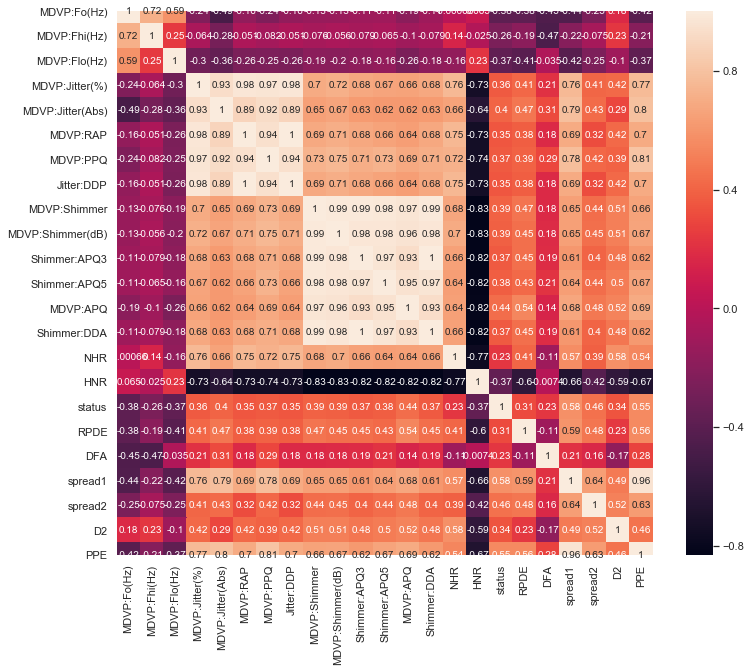

In [46]:
plt.figure(figsize = [12 , 10])
sns.heatmap(  df1_num.corr() ,annot = True )

In [48]:
df1_num.corr()[df1_num.corr()>0.5]['status']

MDVP:Fo(Hz)              NaN
MDVP:Fhi(Hz)             NaN
MDVP:Flo(Hz)             NaN
MDVP:Jitter(%)           NaN
MDVP:Jitter(Abs)         NaN
MDVP:RAP                 NaN
MDVP:PPQ                 NaN
Jitter:DDP               NaN
MDVP:Shimmer             NaN
MDVP:Shimmer(dB)         NaN
Shimmer:APQ3             NaN
Shimmer:APQ5             NaN
MDVP:APQ                 NaN
Shimmer:DDA              NaN
NHR                      NaN
HNR                      NaN
status              1.000000
RPDE                     NaN
DFA                      NaN
spread1             0.578526
spread2                  NaN
D2                       NaN
PPE                 0.552588
Name: status, dtype: float64

In [49]:
df1_num.corr()[df1_num.corr()>0.5]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.717581,0.588703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),0.717581,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),0.588703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,1.000000,0.931450,0.975744,0.968915,0.975766,0.697025,0.719691,...,0.678663,0.761456,NaN,NaN,NaN,NaN,0.756912,NaN,NaN,0.767361
MDVP:Jitter(Abs),NaN,NaN,NaN,0.931450,1.000000,0.889026,0.924086,0.889080,0.647092,0.668841,...,0.626432,0.663470,NaN,NaN,NaN,NaN,0.786443,NaN,NaN,0.798240
MDVP:RAP,NaN,NaN,NaN,0.975744,0.889026,1.000000,0.944151,0.999999,0.689367,0.708809,...,0.680281,0.753639,NaN,NaN,NaN,NaN,0.694885,NaN,NaN,0.697925
MDVP:PPQ,NaN,NaN,NaN,0.968915,0.924086,0.944151,1.000000,0.944169,0.732968,0.754798,...,0.709241,0.721681,NaN,NaN,NaN,NaN,0.778992,NaN,NaN,0.809538
Jitter:DDP,NaN,NaN,NaN,0.975766,0.889080,0.999999,0.944169,1.000000,0.689401,0.708822,...,0.680312,0.753690,NaN,NaN,NaN,NaN,0.694986,NaN,NaN,0.698032
MDVP:Shimmer,NaN,NaN,NaN,0.697025,0.647092,0.689367,0.732968,0.689401,1.000000,0.992206,...,0.989839,0.676619,NaN,NaN,NaN,NaN,0.645973,NaN,0.508433,0.661652
MDVP:Shimmer(dB),NaN,NaN,NaN,0.719691,0.668841,0.708809,0.754798,0.708822,0.992206,1.000000,...,0.976888,0.696290,NaN,NaN,NaN,NaN,0.647369,NaN,0.510311,0.665864


In [58]:
inp = df1_num

In [60]:
inp = inp.drop('status' ,axis =1)

In [61]:
inp.values

array([[1.1999200e+02, 1.5730200e+02, 7.4997000e+01, ..., 2.6648200e-01,
        2.3014420e+00, 2.8465400e-01],
       [1.2240000e+02, 1.4865000e+02, 1.1381900e+02, ..., 3.3559000e-01,
        2.4868550e+00, 3.6867400e-01],
       [1.1668200e+02, 1.3111100e+02, 1.1155500e+02, ..., 3.1117300e-01,
        2.3422590e+00, 3.3263400e-01],
       ...,
       [1.7468800e+02, 2.4000500e+02, 7.4287000e+01, ..., 1.5845300e-01,
        2.6797720e+00, 1.3172800e-01],
       [1.9876400e+02, 2.9994764e+02, 7.4904000e+01, ..., 2.0745400e-01,
        2.1386080e+00, 1.2330600e-01],
       [2.1428900e+02, 2.6027700e+02, 7.7973000e+01, ..., 1.9066700e-01,
        2.5554770e+00, 1.4856900e-01]])

In [64]:
## lets use variation inflation technique to find the correalation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp.values , i) for i in range(inp.shape[1])]
vif['feature'] = inp.columns
vif.sort_values('VIF' , ascending = False).head(10)

,VIF,feature
10,4.809653e+07,Shimmer:APQ3
13,4.808397e+07,Shimmer:DDA
7,1.807312e+06,Jitter:DDP
5,1.805469e+06,MDVP:RAP
8,2.312107e+03,MDVP:Shimmer
17,3.967452e+02,DFA
9,3.827471e+02,MDVP:Shimmer(dB)
3,3.759660e+02,MDVP:Jitter(%)
18,3.561511e+02,spread1
11,2.845592e+02,Shimmer:APQ5


In [73]:
# we can see the high corelation between the columns  now lets drop them 

inp1 = inp.drop(['Shimmer:APQ3' , 'Shimmer:DDA'  ,'Jitter:DDP' , 'MDVP:RAP'  , 'MDVP:Shimmer' ,'DFA' ,
                 'MDVP:Shimmer(dB)' , 'MDVP:Jitter(%)'  ,'spread1' , 'MDVP:PPQ' , 'D2' ,'MDVP:APQ','MDVP:Fo(Hz)'
                ,'PPE' , 'HNR' ,'RPDE'] ,axis =1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp1.values , i) for i in range(inp1.shape[1])]
vif['feature'] = inp1.columns
vif.sort_values('VIF' , ascending = False).head(10)



,VIF,feature
0,10.199175,MDVP:Fhi(Hz)
5,9.673892,spread2
3,7.760673,Shimmer:APQ5
1,7.668887,MDVP:Flo(Hz)
2,7.474642,MDVP:Jitter(Abs)
4,3.624468,NHR


In [ ]:
## as we can see we have to drop significant chunk of columns in order to  get rid of multi collinearity

In [ ]:
#still its unacceptable we have to drop

### Q8. Split dataset into training & test dataset  

In [76]:
x= inp1
y = df1['status']

In [78]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain , xtest , ytrain ,ytest =  train_test_split(x_sc ,y  ,test_size = 0.25  , random_state = 0)

In [85]:
xtrain.shape , xtest.shape , ytrain.shape ,ytest.shape 

((146, 6), (49, 6), (146,), (49,))

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
 lr= LogisticRegression()

In [88]:
lr.fit(xtrain ,ytrain )

LogisticRegression()

In [90]:
ypred = lr.predict(xtest)

In [91]:
from sklearn import metrics

In [92]:
acc = metrics.accuracy_score(ytest , ypred)
acc*100   

89.79591836734694

In [93]:
lr.score(xtrain , ytrain )

0.821917808219178

In [94]:
lr.score(xtest , ytest)   ## model is predicting quite ok  

0.8979591836734694

In [95]:
cm = metrics.confusion_matrix(ytest , ypred)
cm

array([[ 8,  3],
       [ 2, 36]], dtype=int64)

### Q9. Create a default decision tree model using criterion = Entropy 

In [ ]:
# for decision tree  i am going to df1_num as my input its a non linear model hence , assumption is not relly required

In [96]:
df1_num.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [100]:
x = df1_num.drop('status' , axis =1)
y =df1_num['status']


In [101]:
x_sc1  = sc.fit_transform(x)

In [104]:
xtrain , xtest , ytrain ,ytest =  train_test_split(x_sc1 ,y  ,test_size = 0.25  , random_state = 0)

In [105]:
xtrain.shape , xtest.shape , ytrain.shape ,ytest.shape

((146, 22), (49, 22), (146,), (49,))

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier()

In [106]:
dt.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [107]:
dt.score(xtrain ,ytrain)

1.0

In [108]:
dt.score(xtest ,ytest) ## model is overfitting 

0.8979591836734694

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [154]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
param = {'max_depth' : np.arange(1,15), 'min_samples_leaf' : np.arange(1,4)}
kf = KFold(shuffle = True, n_splits = 5, random_state = 0)
GS = GridSearchCV(dt_model, param, cv = kf, scoring = 'roc_auc')
GS.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([1, 2, 3])},
             scoring='roc_auc')

In [155]:
GS.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [156]:
dt_reg = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', min_samples_leaf = 1, random_state = 0)
dt_reg.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [157]:
ypred_reg = dt_reg.predict(xtest)

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
# accuracy
accuracy_score(ytest, ypred_reg)

0.9183673469387755

In [163]:
# precision
precision_score(ytest, ypred_reg)

0.925

In [165]:
# recall
recall_score(ytest, ypred_reg)

0.9736842105263158

In [164]:
# f1 score
f1_score(ytest, ypred_reg)

0.9487179487179489

In [166]:
confusion_matrix(ytest, ypred_reg)

array([[ 8,  3],
       [ 1, 37]], dtype=int64)

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf =RandomForestClassifier()

In [143]:
rf.fit(xtrain ,ytrain)

RandomForestClassifier()

In [144]:
rf.score(xtrain ,ytrain) ## no chance of bias error 

1.0

In [145]:
rf.score(xtest ,ytest)  ## over fitting  lets look for  good params

0.9183673469387755

In [ ]:
# params currently in use


In [115]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = [{'criterion' : ['gini' ,'entropy']} , {'max_depth' : np.arange(1,100)} , {'n_estimators' :'n'} ,{'max_features' :['auto' , 'sqrt' , 'Log2'] }]

In [120]:
 from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,100),'criterion' : ['entropy','gini']}
GS=GridSearchCV(rf,parameter,cv=5,scoring='roc_auc')
GS.fit(x , y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [123]:
GS.best_params_   # we already knew and here we can see criterion entopy with max depth 1 will be good 

{'criterion': 'entropy', 'max_depth': 1}

In [124]:
## now for optimal number of trees

In [130]:
RF = RandomForestClassifier()
from sklearn.model_selection import KFold ,cross_val_score

In [131]:
RF_ve=[]
RF_be=[]
for n in np.arange(1,100):
    RF=RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
    kf=KFold(shuffle=True,n_splits=5,random_state=0)
    auc=cross_val_score(RF,x,y,cv=kf,scoring='roc_auc')
    RF_be.append(np.mean(1-auc))
    RF_ve.append(np.std(1-auc))

In [134]:
np.min(RF_ve) , np.argmin(RF_ve)  ,  RF_be[ 67]

(0.013636466642397128, 67, 0.0426430250783699)

In [ ]:
## hence we 68 trees in total for random forest classifier  for optimization 

In [146]:
rf1 =RandomForestClassifier(n_estimators=68)

In [147]:
rf1.fit(xtrain ,ytrain)

RandomForestClassifier(n_estimators=68)

In [148]:
rf1.score(xtrain ,ytrain)

1.0

In [149]:
rf1.score(xtest ,ytest)

0.9183673469387755

In [152]:
ypred1 = rf1.predict(xtest)

In [153]:
cf =  metrics.confusion_matrix(ytest , ypred1)
cm

array([[ 8,  3],
       [ 2, 36]], dtype=int64)